In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

In [2]:
data = pd.read_csv(r"/home/onyxia/work/df_final.csv")
data.shape

/tmp/ipykernel_7187/3795554216.py:1: DtypeWarning: Columns (1,19,20,21,22,34,39,40,41,42,43,49,51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"/home/onyxia/work/df_final.csv")


(5017137, 54)

### Analyse de la forme des données

In [3]:
df = data.copy()

<Axes: ylabel='count'>

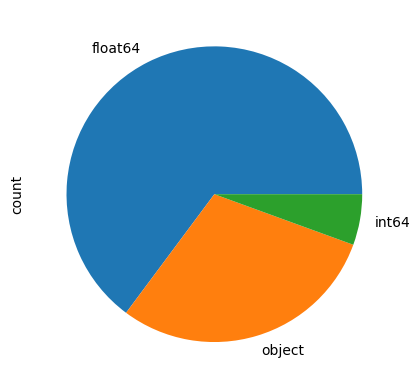

In [4]:
df.dtypes.value_counts().plot.pie()

In [6]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [5]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

index                                              0.000000
code_commune_INSEE                                 0.000000
lat                                                0.000000
lon                                                0.000000
region                                             0.000000
number_sta                                         0.000000
date                                               0.000000
lat_sta                                            0.000000
lon_sta                                            0.000000
height_sta                                         0.000000
incendie                                           0.000000
t                                                  0.038089
hu                                                 0.242230
td                                                 0.242340
precip                                             0.332814
ff                                                 0.585039
dd                                      

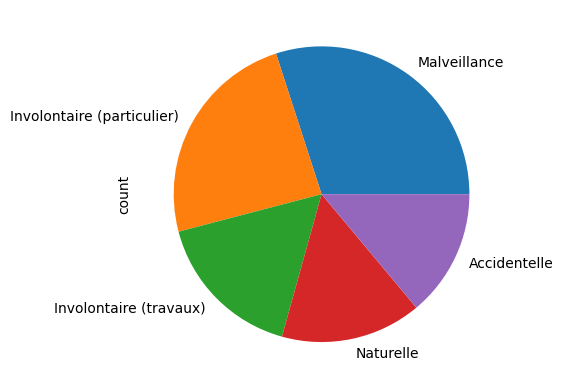

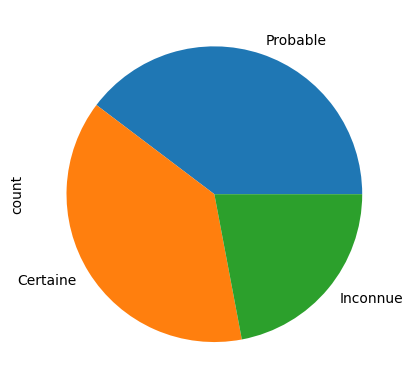

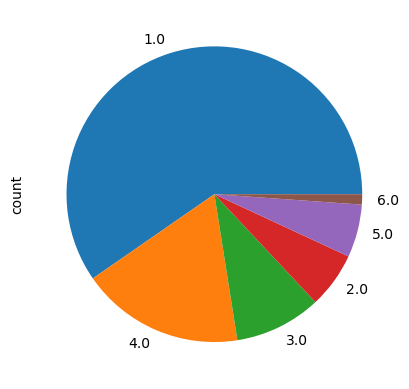

In [6]:
for col in ['Nature','Connaissance','Type de peuplement']:
    plt.figure()
    data[col].value_counts().plot.pie()

## Analyse du Fond
### 1. Visulation initiale - Elimination des colonnes inutiles

In [7]:
df = df[df.columns[df.isna().sum()/df.shape[0] <0.99]]
df.head()
df.shape

(5017137, 18)

<Axes: >

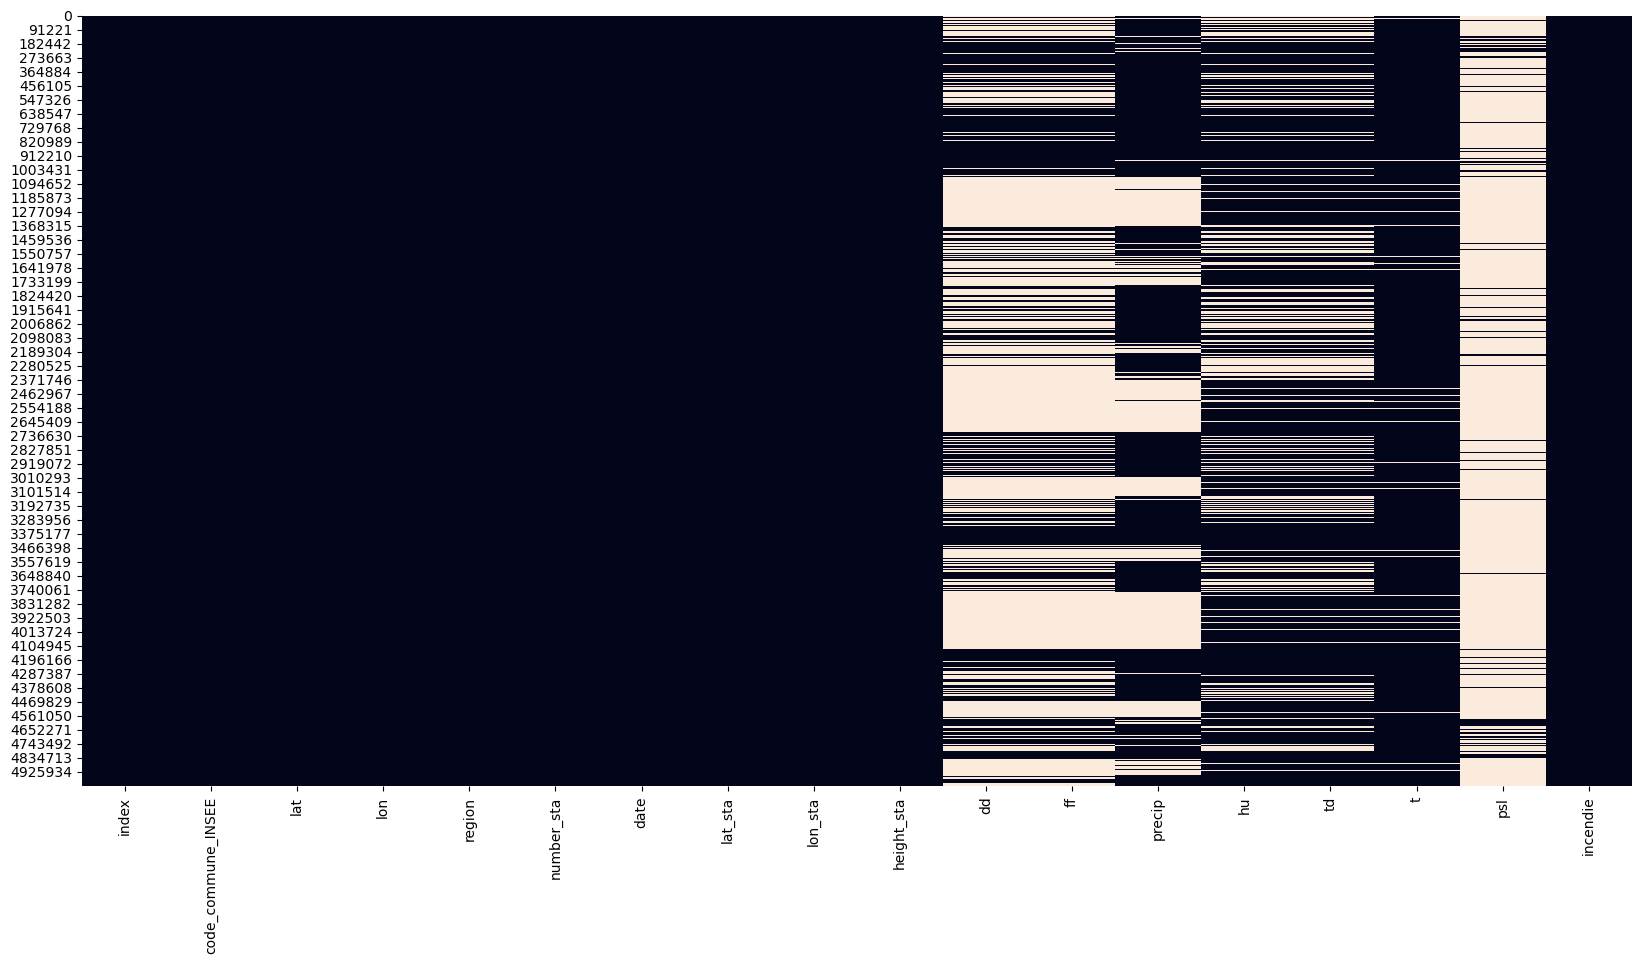

In [8]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

### Examen de la colonne incendie
Peu de jours avec incendie, la métrique d'évaluation du modèle devra en prendre compte

In [9]:
df['incendie'].value_counts(normalize=True)

incendie
0    0.999713
1    0.000287
Name: proportion, dtype: float64

In [10]:
df['incendie'].sum()

1442

### Histogrames des variables continues 

#### Tout d'abord, convertissons les températures en delgré Celsius

In [11]:
df['t']=df['t']-273.15
df['td']=df['td']-273.15

#### distribution des variables météorologiques 

/tmp/ipykernel_7187/2000503223.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


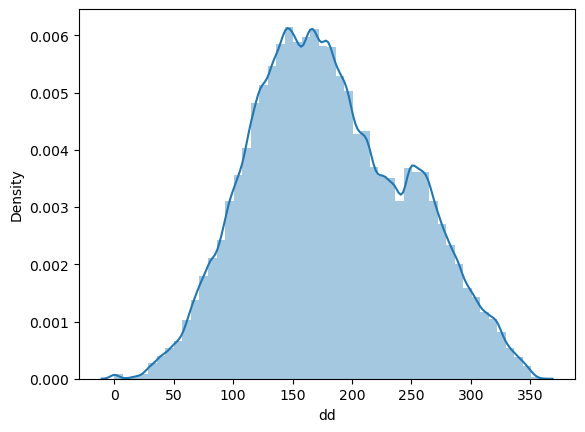

/tmp/ipykernel_7187/2000503223.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


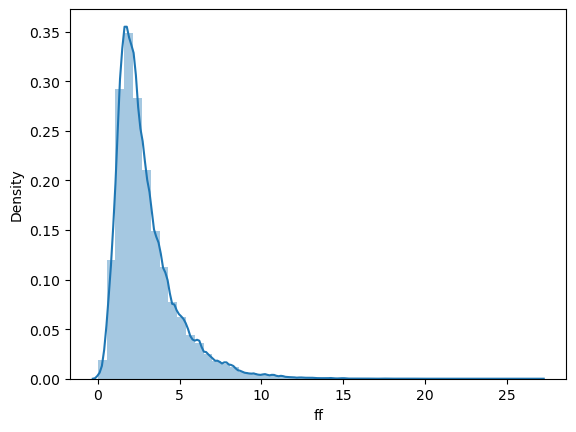

/tmp/ipykernel_7187/2000503223.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


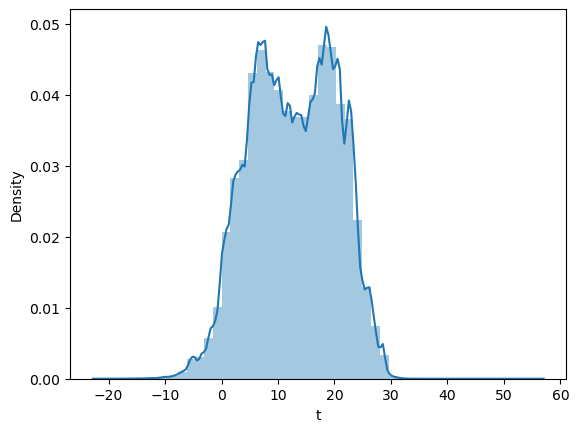

/tmp/ipykernel_7187/2000503223.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


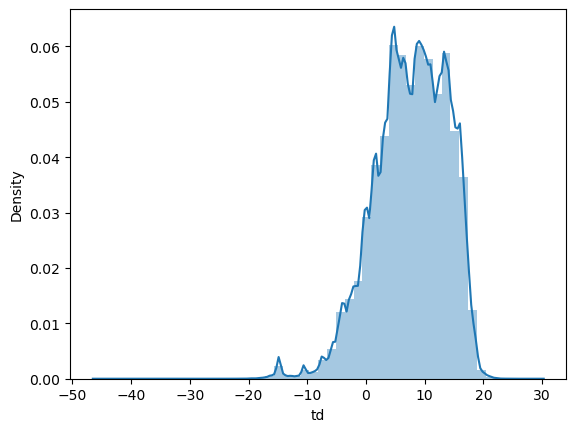

/tmp/ipykernel_7187/2000503223.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


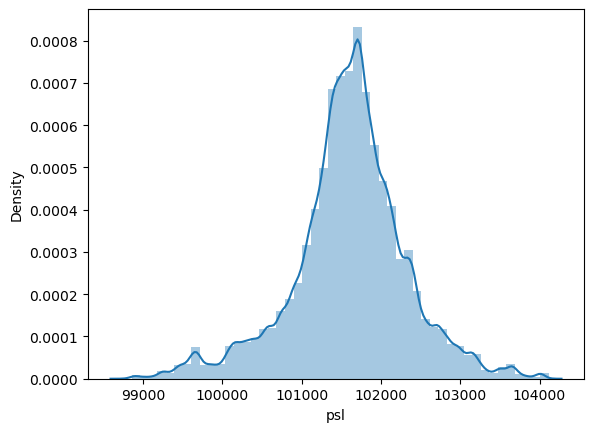

/tmp/ipykernel_7187/2000503223.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


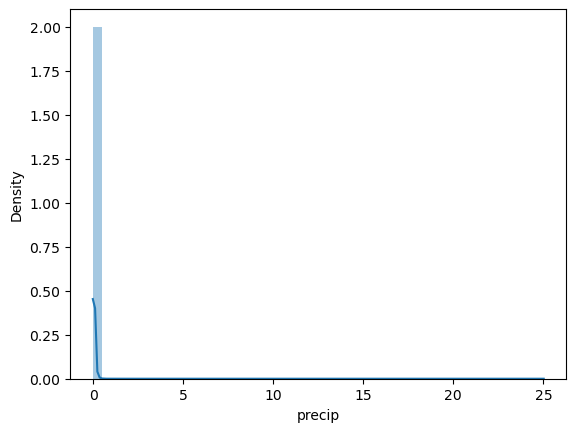

/tmp/ipykernel_7187/2000503223.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


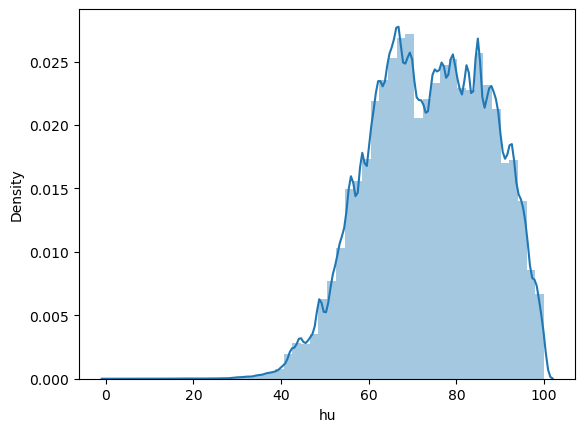

In [12]:
for col in ['dd','ff','t','td','psl','precip','hu']:
    plt.figure()
    sns.distplot(df[col])
    plt.show()

#### distribution des variables météorologiques (alternative à seaborn)

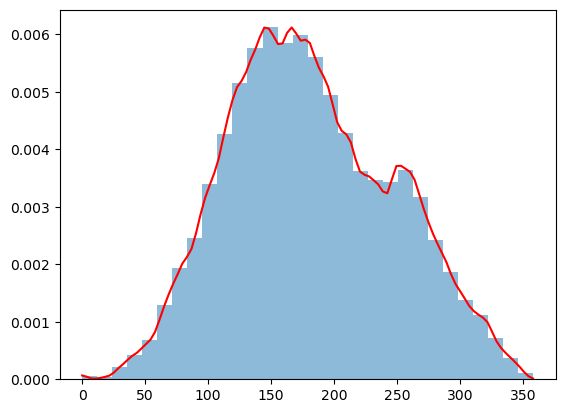

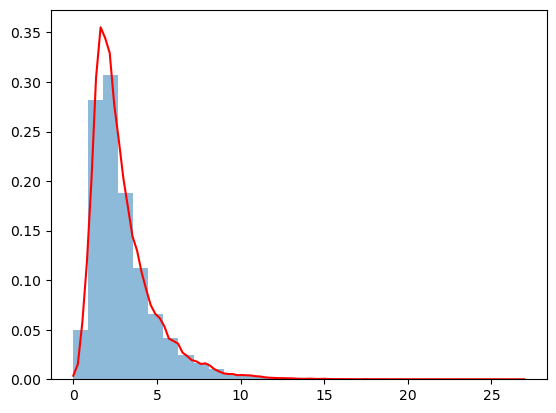

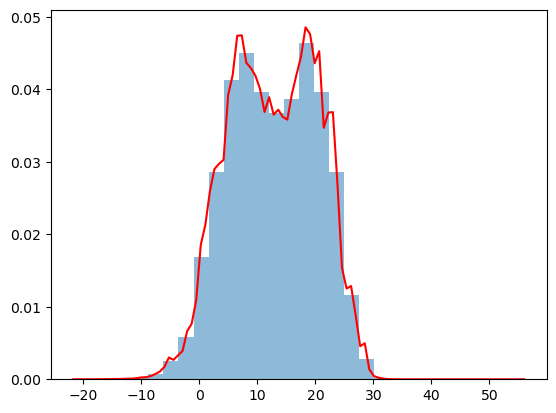

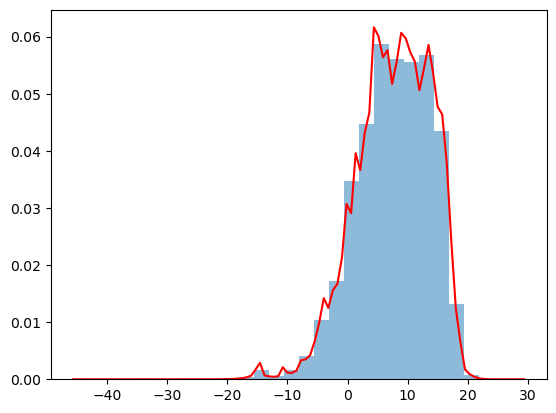

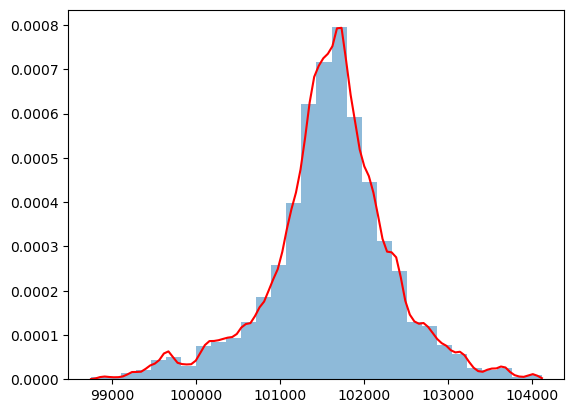

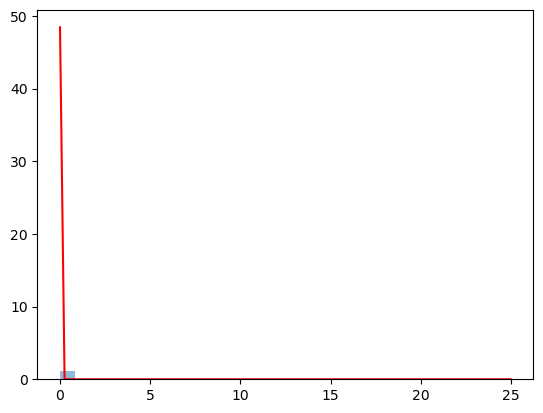

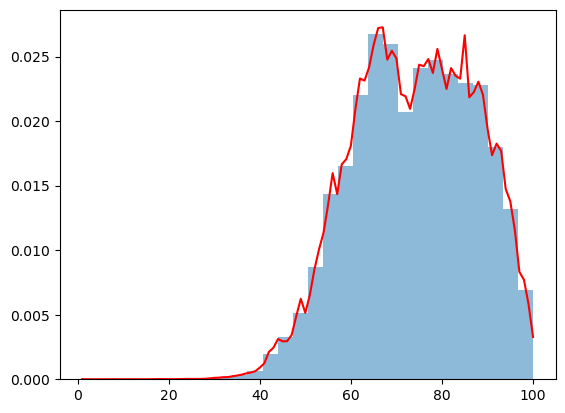

In [13]:
for col in ['dd','ff','t','td','psl','precip','hu']:
    kde = gaussian_kde(df[col].dropna())
    x_range = np.linspace(min(df[col].dropna()), max(df[col].dropna()), 100)

    plt.hist(df[col].dropna(), bins=30, density=True, alpha=0.5)
    plt.plot(x_range, kde(x_range), color='red')
    plt.show()

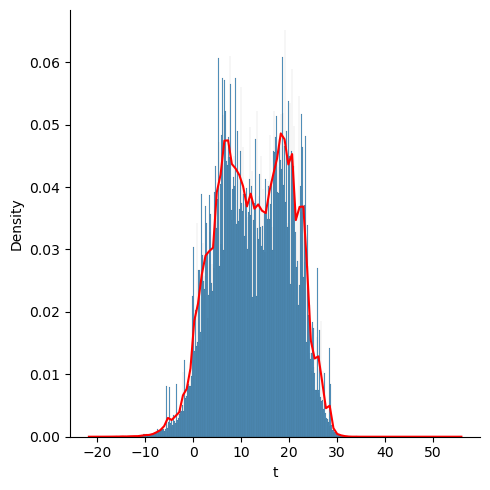

In [14]:
sns.displot(df['t'], stat='density')
kde = gaussian_kde(df['t'].dropna())
x_range = np.linspace(min(df['t'].dropna()), max(df['t'].dropna()), 100)

plt.plot(x_range, kde(x_range), color='red')
plt.show()

### Variables Qualitatives

In [15]:
for col in df.select_dtypes('object'):
    print(f'{col :-<50} {df[col].unique()}')

code_commune_INSEE-------------------------------- [1001 1002 1004 ... 87204 87205 87206]
region-------------------------------------------- ['Auvergne-Rhône-Alpes' "Provence-Alpes-Côte d'Azur" 'Occitanie'
 'Nouvelle-Aquitaine' 'Corse']
date---------------------------------------------- ['2018-12-05' '2018-12-14' '2018-12-15' '2018-12-16' '2018-12-17'
 '2018-12-18' '2018-12-19' '2018-12-20' '2018-12-21' '2018-12-22'
 '2018-12-23' '2018-12-24' '2018-12-25' '2018-12-26' '2018-12-27'
 '2018-12-28' '2018-12-29' '2018-12-30' '2018-12-31' '2018-01-01'
 '2018-01-02' '2018-01-03' '2018-01-04' '2018-01-05' '2018-01-06'
 '2018-01-07' '2018-01-08' '2018-01-09' '2018-01-10' '2018-01-11'
 '2018-01-12' '2018-01-13' '2018-01-14' '2018-01-15' '2018-01-16'
 '2018-01-17' '2018-01-18' '2018-01-19' '2018-01-20' '2018-01-21'
 '2018-01-22' '2018-01-23' '2018-01-24' '2018-01-25' '2018-01-26'
 '2018-01-27' '2018-01-28' '2018-01-29' '2018-01-30' '2018-01-31'
 '2018-02-01' '2018-02-02' '2018-02-03' '2018-02-04'

## Relation Target / Variables
### Création de sous-ensembles positifs et négatifs

In [21]:
incendie_df = df[df['incendie'] == 1]
no_incendie_df = df[df['incendie'] == 0]

### taux d'absence de valeurs

In [81]:
missing_rate = df.isna().sum()/df.shape[0]
print(missing_rate)

index                 0.000000
code_commune_INSEE    0.000000
lat                   0.000000
lon                   0.000000
region                0.000000
number_sta            0.000000
date                  0.000000
lat_sta               0.000000
lon_sta               0.000000
height_sta            0.000000
dd                    0.585059
ff                    0.585039
precip                0.332814
hu                    0.242230
td                    0.242340
t                     0.038089
psl                   0.912757
incendie              0.000000
dtype: float64


#### distributions des variables météorologiques pour les jours d'incendies et les jours sans incendies

/tmp/ipykernel_7187/1875366066.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(incendie_df[col], label='positive', color='red')
/tmp/ipykernel_7187/1875366066.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(no_incendie_df[col], label='negative', color='blue')
/tmp/ipykernel_7187/18753660

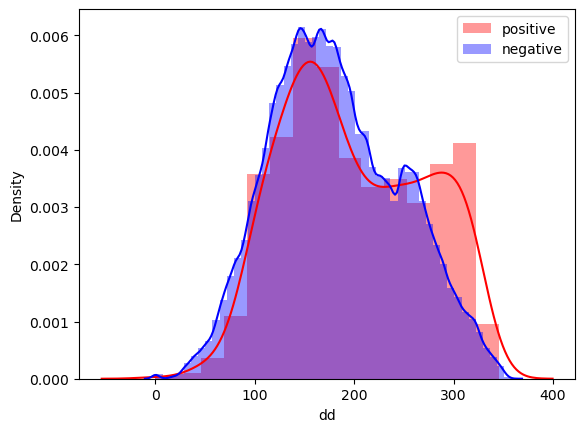

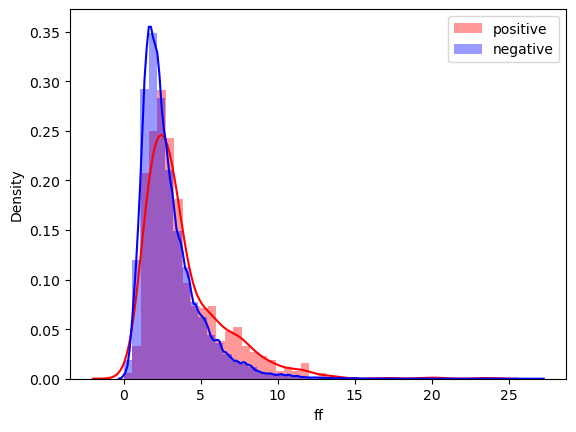

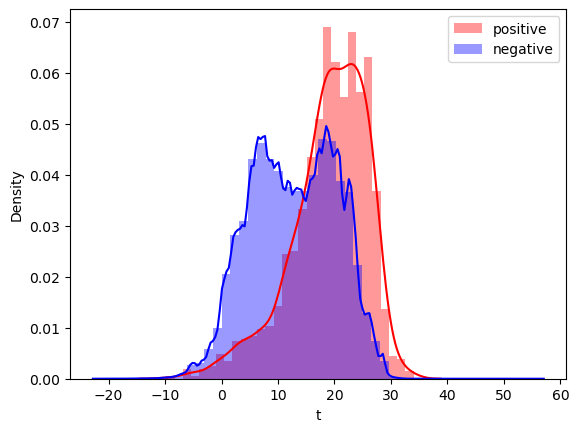

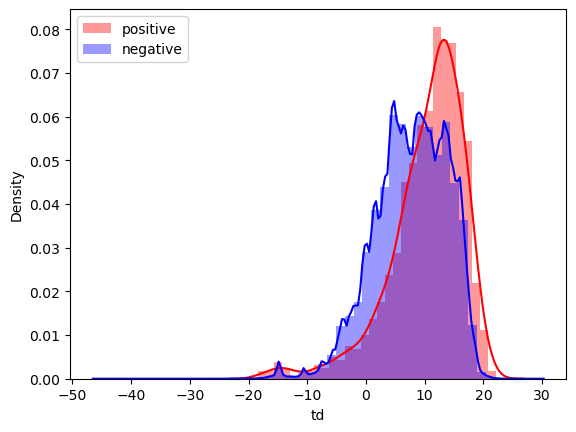

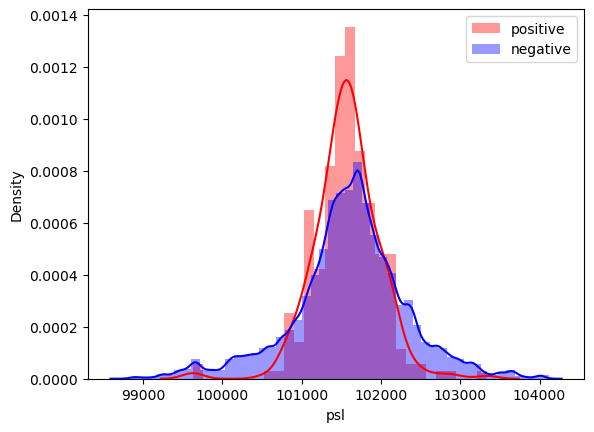

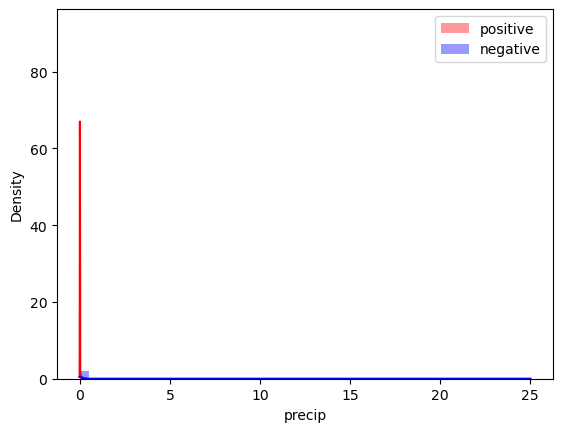

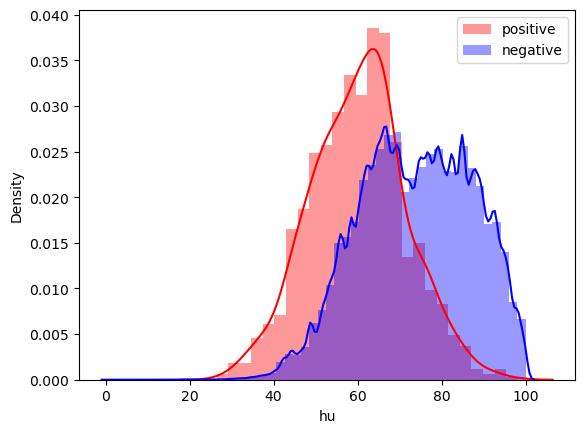

In [23]:
for col in ['dd','ff','t','td','psl','precip','hu']:
    plt.figure()
    sns.distplot(incendie_df[col], label='positive', color='red')
    sns.distplot(no_incendie_df[col], label='negative', color='blue')
    plt.legend()

### corrélations entre variables météorologiques

In [1]:
df[['dd','ff','t','td','psl','precip','hu']].corr()

NameError: name 'df' is not defined

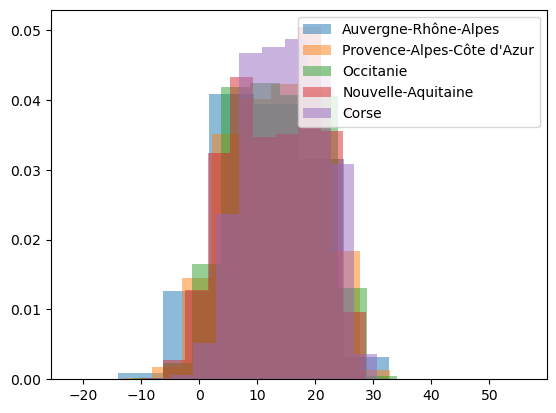

In [25]:

plt.figure()
for cat in df['region'].unique():
    plt.hist(df[df['region']==cat]['t'].dropna(),bins=10, density=True, alpha=0.5, label=cat)
plt.legend()

/tmp/ipykernel_7187/2632503535.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['region']==cat]['t'], label=cat)
/tmp/ipykernel_7187/2632503535.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['region']==cat]['t'], label=cat)
/tmp/ipykernel_7187/2632503535.py:3: UserWarning: 



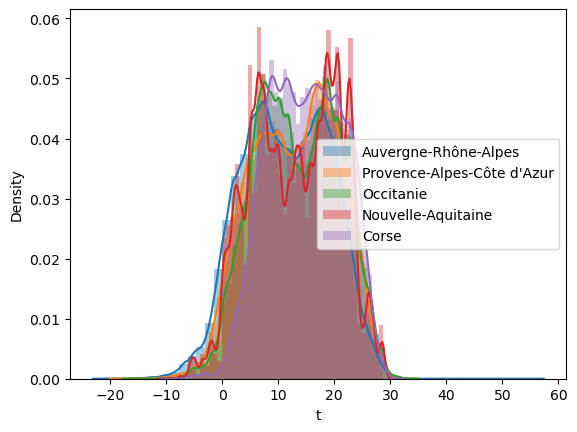

In [26]:
plt.figure()
for cat in df['region'].unique():
    sns.distplot(df[df['region']==cat]['t'], label=cat)
plt.legend()

## T-Test

In [64]:
from scipy.stats import ttest_ind

In [65]:
balanced_neg = no_incendie_df.sample(incendie_df.shape[0])

In [66]:
for col in ['dd','ff','t','td','psl','precip','hu']:
    stat, p = ttest_ind(balanced_neg[col].dropna(), incendie_df[col].dropna())

    print(col,p)

dd 1.432390662631065e-07
ff 1.0575956045806356e-12
t 5.589024813884139e-108
td 9.490119952665402e-23
psl 0.8412951115064559
precip 0.16937141706666373
hu 1.5081885307955212e-123


La variable précipitation n'est pas distribuée normalement (même conditionellement à l'incendie) donc les hypothèses du t-test ne sont pas vérifiées. La normalité des autres variables est également discutable, nous allons alors faire un test non paramétrique: celui de Mann Whitney.

## test de Mann Whitney

In [76]:
from scipy.stats import mannwhitneyu

In [77]:
for col in ['dd','ff','t','td','psl','precip','hu']:
    stat, p = mannwhitneyu(balanced_neg[col].dropna(), incendie_df[col].dropna())
    print(col,p)

dd 2.567262354706836e-06
ff 1.1305774950255587e-12
t 2.7810696925819686e-104
td 1.7163073727334056e-30
psl 0.160747155299506
precip 1.4419775898673226e-40
hu 3.879156400565424e-108


 On trouve les mêmes significativité de la différence moyenne/médiane des variables météorologiques selon qu'il y ait un incendie ou non. Cependant pour la précipitation, le test de Mann Whitney trouve une différence médiane significative qui n'était pas trouvée par le t-test. Le test de Mann Whitney est plus robuste compte tenu des hypothèses de normalité qui ne sont pas respectées. Un autre test est celui de la corrélation de Pearson qui étudie si la corrélation entre la variable incendie et la variable météorologique est significativement différente de 0, à noter que lorsqu'une des deux variables est binaire on appelle cette corrélation la corrélation du point bisériel.

## test de Pearson

In [80]:
from scipy.stats import pearsonr

# Calcul de la corrélation de point bisériel
for col in ['dd','ff','t','td','psl','precip','hu']:
    dfcol=df[[col,'incendie']].dropna()
    corr, p_value = pearsonr(dfcol[col], dfcol['incendie'])
    print(col)
    print('Coefficient de corrélation de point bisériel:', corr)
    print('P-value:', p_value)


dd
Coefficient de corrélation de point bisériel: 0.006095784140236081
P-value: 1.4256413743288278e-18
ff
Coefficient de corrélation de point bisériel: 0.010427608785240284
P-value: 3.6540255244087337e-51
t
Coefficient de corrélation de point bisériel: 0.014264388850828452
P-value: 1.4196961484219634e-215
td
Coefficient de corrélation de point bisériel: 0.007871010464071395
P-value: 3.7525651740625535e-53
psl
Coefficient de corrélation de point bisériel: -0.0010460780719684089
P-value: 0.48888767481110557
precip
Coefficient de corrélation de point bisériel: -0.0012602480688508185
P-value: 0.02112596082994058
hu
Coefficient de corrélation de point bisériel: -0.01813874167470398
P-value: 4.876781496295125e-274
